In [1]:
# Read in necessary libraries
import pandas as pd
import altair as alt
import datetime as dt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
# Read in Taubate data <https://www.kaggle.com/datasets/rafaelsantos0/rainfall-and-temperature-in-taubate?select=32531_.csv>
taubate = pd.read_csv("Taubate.csv")

# Examine the dataset
taubate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TAUBATE                       13 non-null     object 
 1   Maximum Absolute Temperature  13 non-null     float64
 2   Maximum Average Temperature   13 non-null     float64
 3   Average Temperature           13 non-null     float64
 4   Minimum Average Temperature   13 non-null     float64
 5   Minimum Absolute Temperature  13 non-null     float64
 6   Rainfall (mm)                 13 non-null     float64
 7   Days with Rainfall >= 1mm     13 non-null     int64  
 8   Relative Humidity             13 non-null     float64
 9   Sunshine Hours                13 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
taubate

,TAUBATE,Maximum Absolute Temperature,Maximum Average Temperature,Average Temperature,Minimum Average Temperature,Minimum Absolute Temperature,Rainfall (mm),Days with Rainfall >= 1mm,Relative Humidity,Sunshine Hours
0,Jan,36.7,30.2,23.3,17.7,10.9,233.5,17,76.8,170.0
1,Feb,40.1,30.5,23.5,17.8,12.6,192.1,14,76.7,168.2
2,Mar,36.2,29.9,22.9,17.8,11.6,173.5,12,76.8,179.5
3,Apr,34.2,27.8,20.8,16.1,5.4,67.1,7,75.9,177.3
4,May,32.6,25.4,18.1,14.2,4.2,40.9,4,76.2,176.1
5,Jun,31.0,24.6,16.7,12.9,1.1,29.3,4,75.7,175.6
6,Jul,32.1,24.4,16.4,12.6,0.9,31.1,4,72.5,188.9
7,Aug,35.6,26.4,18.2,14.0,2.6,41.7,4,69.1,186.2
8,Sep,37.8,27.6,20.0,15.7,3.8,64.0,6,69.2,158.8
9,Oct,38.0,27.5,20.7,16.4,7.8,132.8,11,74.0,148.8


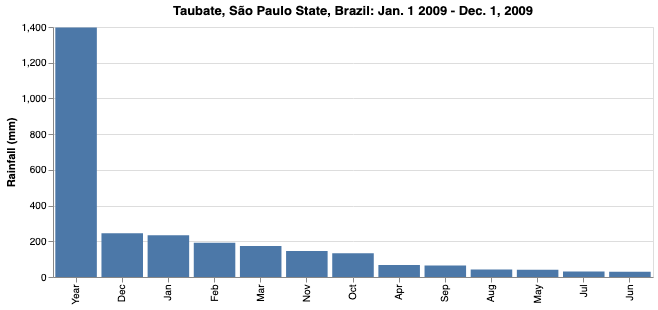

In [14]:
# Create a plot of rainfall vs date
t_rainfall = (
    alt.Chart(taubate)
    .mark_bar()
    .encode(
        alt.X('TAUBATE', sort= "-y", title =None),
        alt.Y('Rainfall (mm)', title ='Rainfall (mm)'),
        #alt.Color('humidity',  scale=alt.Scale(scheme='greenblue'))
    ).properties(title= "Taubate, São Paulo State, Brazil: Jan. 1 2009 - Dec. 1, 2009", width=600, height=250)
)
t_rainfall